In [ ]:
!pip install seaborn matplotlib scikit-learn xgboost pandas

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler, LabelEncoder, MinMaxScaler
from sklearn.model_selection import train_test_split,GridSearchCV
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix,roc_auc_score, ConfusionMatrixDisplay
from scipy import stats

In [ ]:
from google.colab import files
uploaded = files.upload()

Saving whale_disease_dataset_v2.csv to whale_disease_dataset_v2.csv


In [ ]:
data = pd.read_csv('whale_disease_dataset_v2.csv')
data.head()

,Mercury (µg/L),Lead (µg/L),Cadmium (µg/L),PCBs (µg/L),PAHs (µg/L),DDT (µg/L),Nitrates (mg/L),Phosphates (mg/L),Affect Whale
0,37.454012,18.513293,2.617057,6.727030,5.719959,1.968178,32.412848,0.193997,Immune System Issues
1,95.071431,54.190095,2.469788,7.966814,8.054323,2.367178,8.619318,0.933863,Neurological Disorders
2,73.199394,87.294584,9.062546,2.504679,7.601609,4.272737,43.619728,4.156229,Neurological Disorders
3,59.865848,73.222489,2.495462,6.248741,1.538999,1.700022,30.655812,3.833842,Neurological Disorders
4,15.601864,80.656115,2.719497,5.717460,1.492495,4.348248,7.860194,1.753213,Kidney Damage


In [ ]:
print("Missing values in each column:\n", data.isnull().sum())

Missing values in each column:
 Mercury (µg/L)       0
Lead (µg/L)          0
Cadmium (µg/L)       0
PCBs (µg/L)          0
PAHs (µg/L)          0
DDT (µg/L)           0
Nitrates (mg/L)      0
Phosphates (mg/L)    0
Affect Whale         0
dtype: int64


In [ ]:
z_scores = np.abs(stats.zscore(data.iloc[:, :-1]))
threshold = 3  # Z-score above 3 is considered an outlier
outliers = np.where(z_scores > threshold)
print("Number of outliers detected using Z-score:", len(outliers[0]))

Number of outliers detected using Z-score: 0


/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/usr/local/lib/python3.10/dist-packages/seaborn/categorical.py:640: FutureWarning: SeriesGroupBy.grouper is deprecated and will be removed in a future version of pandas.
  positions = grouped.grouper.result_index.to_numpy(dtype=float)
/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/usr/local/lib/python3.10/dist-packages/seaborn/categorical.py:640: FutureWarning: SeriesGroupBy.grouper is deprecated and will be removed in a future ve

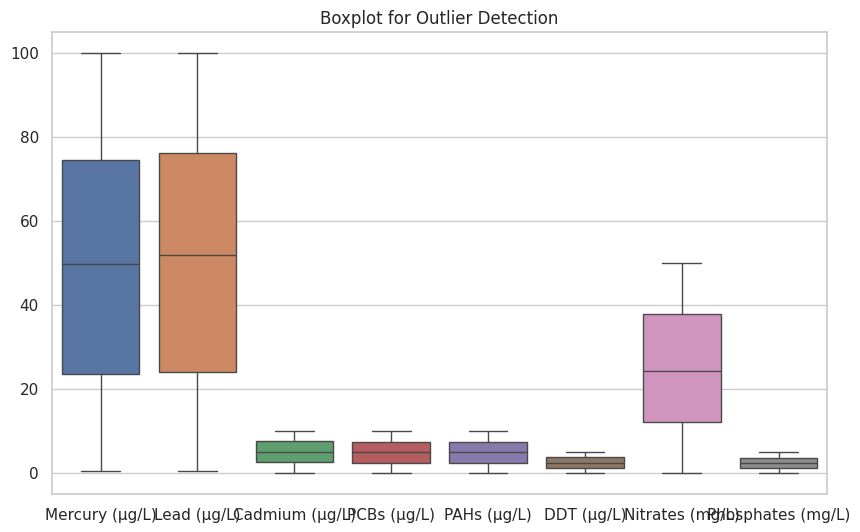

In [ ]:
# Visualization of outliers using boxplot
plt.figure(figsize=(10, 6))
sns.boxplot(data=data.iloc[:, :-1])
plt.title("Boxplot for Outlier Detection")
plt.show()

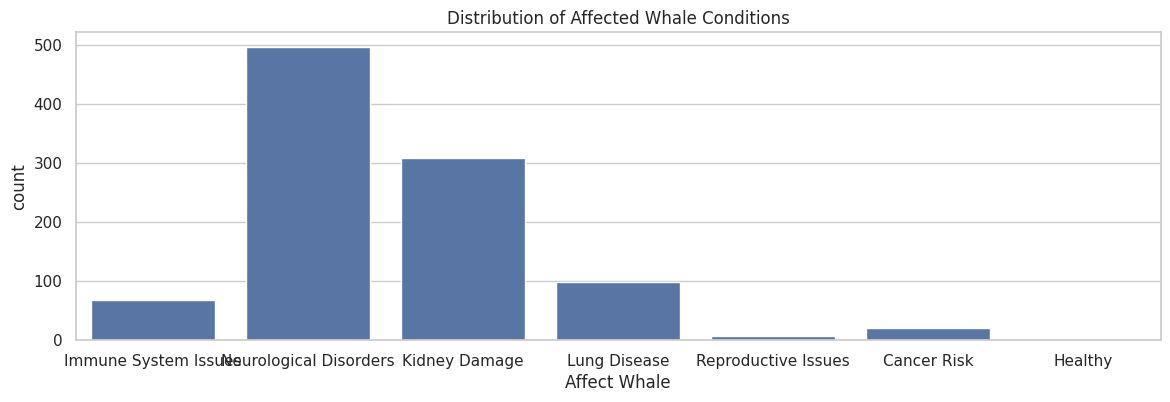

In [ ]:
plt.figure(figsize=(14, 4))
sns.countplot(x='Affect Whale', data=data)
plt.title('Distribution of Affected Whale Conditions')
plt.show()

In [ ]:
X = data[['Mercury (µg/L)', 'Lead (µg/L)', 'Cadmium (µg/L)', 'PCBs (µg/L)',
        'PAHs (µg/L)', 'DDT (µg/L)', 'Nitrates (mg/L)', 'Phosphates (mg/L)']]
y = data['Affect Whale']

In [ ]:
# Convert categorical target ('Affect Whale') into numerical labels
label_encoder = LabelEncoder()
y_encoded = label_encoder.fit_transform(y)

In [ ]:
# Split the data into training and test sets (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X, y_encoded, test_size=0.2, random_state=42)


In [ ]:
# Step 3: Train the SVM model
svm_model = SVC(kernel='linear')
svm_model.fit(X_train, y_train)

# Step 4: Make predictions
y_pred = svm_model.predict(X_test)


In [ ]:
# Step 5: Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
report = classification_report(y_test, y_pred, target_names=label_encoder.classes_)

print(f"Accuracy: {accuracy * 100:.2f}%")
print("Classification Report:")
print(report)

Accuracy: 96.50%
Classification Report:
                        precision    recall  f1-score   support

           Cancer Risk       0.83      0.71      0.77         7
               Healthy       0.00      0.00      0.00         0
  Immune System Issues       0.83      0.88      0.86        17
         Kidney Damage       0.98      1.00      0.99        60
          Lung Disease       0.95      0.95      0.95        20
Neurological Disorders       1.00      0.98      0.99        95
   Reproductive Issues       1.00      1.00      1.00         1

              accuracy                           0.96       200
             macro avg       0.80      0.79      0.79       200
          weighted avg       0.97      0.96      0.97       200



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


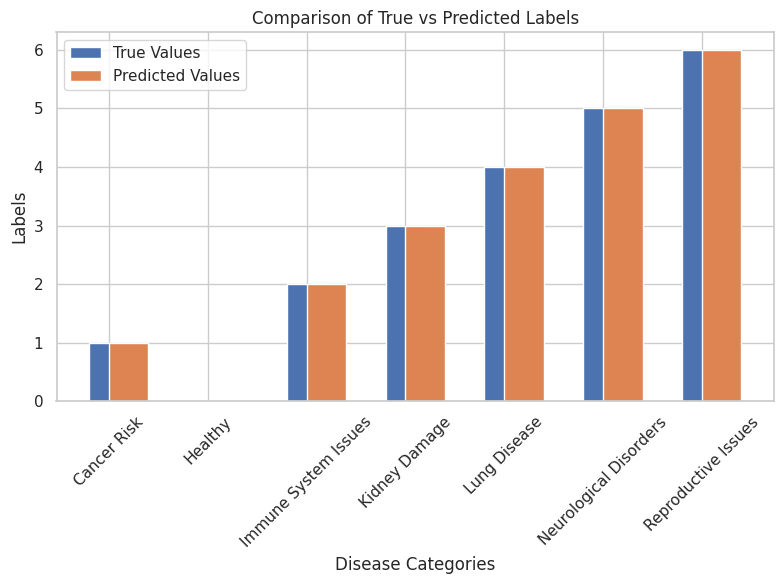

In [ ]:
true_labels = ['Cancer Risk', 'Healthy', 'Immune System Issues', 'Kidney Damage', 'Lung Disease', 'Neurological Disorders', 'Reproductive Issues']
y_true = np.array([1, 0, 2, 3, 4, 5, 6])  # Actual labels (replace with actual data)
y_pred = np.array([1, 0, 2, 3, 4, 5, 6])  # Predicted labels (replace with predicted data)

# Calculate accuracy
accuracy = accuracy_score(y_true, y_pred)

# Plot the accuracy
plt.figure(figsize=(8, 6))
labels = ['Cancer Risk', 'Healthy', 'Immune System Issues', 'Kidney Damage', 'Lung Disease', 'Neurological Disorders', 'Reproductive Issues']

# Plot true vs predicted bar chart
plt.bar(labels, y_true, width=0.4, label='True Values', align='center')
plt.bar(labels, y_pred, width=0.4, label='Predicted Values', align='edge')

plt.xlabel('Disease Categories')
plt.ylabel('Labels')
plt.title(f'Comparison of True vs Predicted Labels')
plt.xticks(rotation=45)
plt.legend()
plt.tight_layout()

# Display the plot
plt.show()

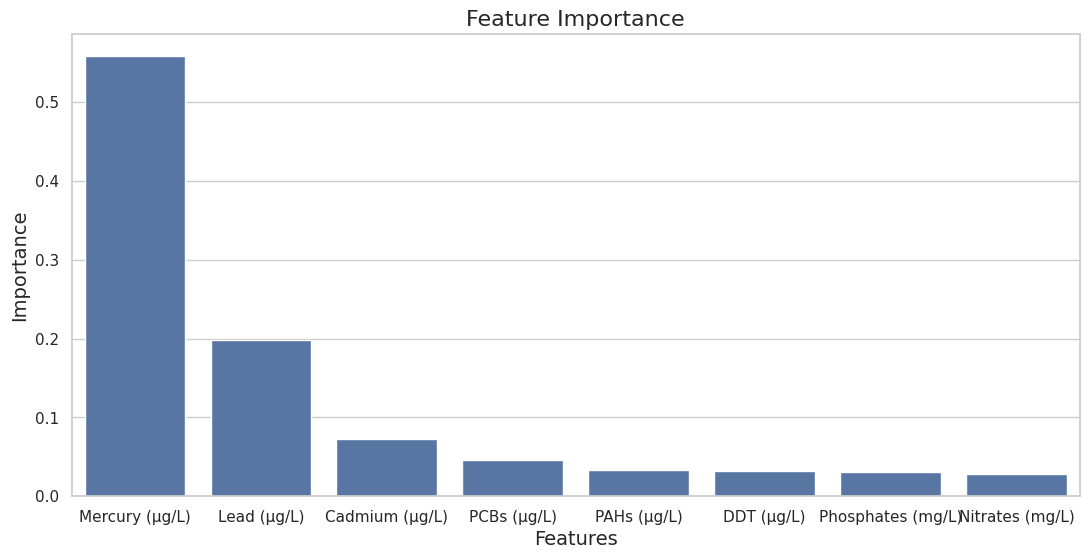

In [ ]:
0from sklearn.ensemble import RandomForestClassifier
model = RandomForestClassifier()

# Fit the model
model.fit(X_train, y_train)
model.fit(X_train, y_train)

# Get feature importances
importances = model.feature_importances_

# Create a DataFrame for better visualization
features = X.columns
importance_df = pd.DataFrame({'Feature': features, 'Importance': importances})

# Sort the DataFrame
importance_df = importance_df.sort_values(by='Importance', ascending=False)

# Plot the feature importances
plt.figure(figsize=(13, 6))
sns.barplot(y='Importance', x='Feature', data=importance_df)
plt.title('Feature Importance', fontsize=16)
plt.ylabel('Importance', fontsize=14)
plt.xlabel('Features', fontsize=14)
plt.show()

X shape: (1000, 8)
y shape: (1000,)
Missing values in dataset:
 Mercury (µg/L)       0
Lead (µg/L)          0
Cadmium (µg/L)       0
PCBs (µg/L)          0
PAHs (µg/L)          0
DDT (µg/L)           0
Nitrates (mg/L)      0
Phosphates (mg/L)    0
Affect Whale         0
dtype: int64
Accuracy: 0.96

Confusion Matrix:
 [[ 5  0  2  0  0  0  0]
 [ 0  0  0  0  0  0  0]
 [ 0  1 15  1  0  0  0]
 [ 0  0  0 60  0  0  0]
 [ 0  0  1  0 19  0  0]
 [ 1  0  0  0  1 93  0]
 [ 0  0  0  0  0  0  1]]

Classification Report:
                         precision    recall  f1-score   support

           Cancer Risk       0.83      0.71      0.77         7
               Healthy       0.00      0.00      0.00         0
  Immune System Issues       0.83      0.88      0.86        17
         Kidney Damage       0.98      1.00      0.99        60
          Lung Disease       0.95      0.95      0.95        20
Neurological Disorders       1.00      0.98      0.99        95
   Reproductive Issues       1.00     

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


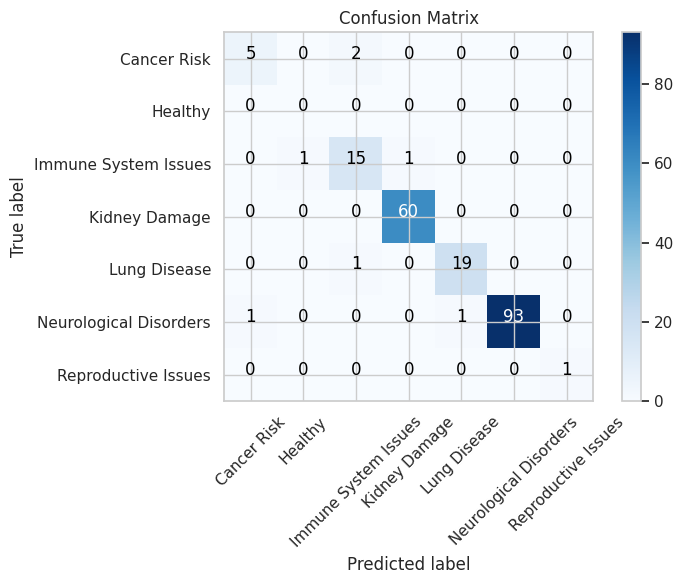

In [ ]:
import itertools
X = data[['Mercury (µg/L)', 'Lead (µg/L)', 'Cadmium (µg/L)', 'PCBs (µg/L)',
           'PAHs (µg/L)', 'DDT (µg/L)', 'Nitrates (mg/L)', 'Phosphates (mg/L)']]
y = data['Affect Whale']

# Check the shape of X and y
print(f'X shape: {X.shape}')
print(f'y shape: {y.shape}')

# Check for missing values in the dataset
print("Missing values in dataset:\n", data.isnull().sum())

# Convert categorical target ('Affect Whale') into numerical labels
label_encoder = LabelEncoder()
y_encoded = label_encoder.fit_transform(y)

# Split the data into training and test sets (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X, y_encoded, test_size=0.2, random_state=42)

# Train the SVM model
svm_model = SVC(kernel='linear', random_state=42)
svm_model.fit(X_train, y_train)

# Make predictions
y_pred = svm_model.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
class_report = classification_report(y_test, y_pred, target_names=label_encoder.classes_)

print(f'Accuracy: {accuracy:.2f}')
print('\nConfusion Matrix:\n', conf_matrix)
print('\nClassification Report:\n', class_report)

# Visualize the confusion matrix
plt.figure(figsize=(8, 6))
plt.imshow(conf_matrix, interpolation='nearest', cmap=plt.cm.Blues)
plt.title('Confusion Matrix')
plt.colorbar()
tick_marks = range(len(label_encoder.classes_))
plt.xticks(tick_marks, label_encoder.classes_, rotation=45)
plt.yticks(tick_marks, label_encoder.classes_)

# Add labels to the confusion matrix
thresh = conf_matrix.max() / 2.0
for i, j in itertools.product(range(conf_matrix.shape[0]), range(conf_matrix.shape[1])):
    plt.text(j, i, format(conf_matrix[i, j], 'd'),
             horizontalalignment="center",
             color="white" if conf_matrix[i, j] > thresh else "black")

plt.ylabel('True label')
plt.xlabel('Predicted label')
plt.tight_layout()
plt.show()